In [11]:
#libs pra criação de toydatasets

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

# manipulação de arrays e dataframes
import pandas as pd
import numpy as np

#plots....

import plotly.express as px
import matplotlib.pyplot as plt

#modelagem
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix



Funções utilizadas

In [52]:
def make_toy_dataset(n_samples=10000, n_features= 2, n_informative= 2, n_redundant=0, 
                          n_repeated=0, n_classes=2, n_clusters_per_class= 1 ,class_sep=2,flip_y=0,weights=[0.5,0.5], 
                          random_state=666):
    
    X,y = make_classification(n_samples = n_samples, n_features = n_features, n_informative = n_informative, 
                              n_redundant = n_redundant, n_repeated = n_repeated, n_classes = n_classes, 
                              n_clusters_per_class = n_clusters_per_class,class_sep = class_sep,
                              flip_y = flip_y,weights = weights,random_state = random_state)
    df = pd.DataFrame(data = X)
    df = df.rename(columns = {0:"x_1",1:"x_2"})
    df["y"] = y
    return df

def make_toy_g_dataset(n_feat = 2, n_classes = 2, rs = 666, n_samp = 500):
    X,y = make_gaussian_quantiles(n_features=n_feat, n_classes=n_classes, n_samples=n_samp,random_state=rs )
    df = pd.DataFrame(data = X)
    df = df.rename(columns = {0:"x_1",1:"x_2"})
    df["y"] = y
    return df
    
def split_data (dataset):
    X = dataset.drop(["y"], axis = 1)
    y = dataset.y

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=666)
    
    return X_train, X_test, y_train, y_test

def linear_svm(dataset, c = 1):
    X_train = split_data(dataset = dataset)[0]
    y_train = split_data(dataset = dataset)[2]
    svc_lin = LinearSVC(C = c)
    svc_lin.fit(X_train,y_train)
    return svc_lin

def plot_cm(modelo, dataset):
    
    X_test = split_data(dataset = dataset)[1]
    y_test = split_data(dataset = dataset)[3]
    plot_confusion_matrix(modelo, X_test, y_test)
    

# fonte: https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_svm(x_1,x_2,y,modelo):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.

    X0, X1 = x_1, x_2
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, modelo, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
    
def relatorio_svm(dataset, modelo):
    
    X_test = split_data(dataset)[1]
    
    x_1 = X_test.x_1
    x_2 = X_test.x_2
    
    y_test = split_data(dataset)[3]
    
    plot_cm(modelo = modelo, dataset = dataset)
    plot_svm(x_1 = x_1 ,x_2 = x_2 , y= y_test, modelo = modelo)
    

def svc(dataset, kernel = 'rbf', gamma = 'auto', c = 1):
    X_train = split_data(dataset = dataset)[0]
    y_train = split_data(dataset = dataset)[2]
    svc = SVC(kernel = 'rbf', gamma='auto',C = c,random_state=666)
    svc.fit(X_train,y_train)
    return svc

Criação do primeiro dataset: balanceado, 2 features, linearmente separável

In [41]:
df_1 = make_toy_dataset(n_samples=10000, n_features= 2, n_informative= 1, n_redundant=0, 
                          n_repeated=0, n_classes=2, n_clusters_per_class= 1 ,class_sep=2,flip_y=0,weights=[0.5,0.5], 
                          random_state=666)

fig = px.scatter(x=df_1.x_1, y=df_1.x_2, color = df_1.y)
fig.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A1FA12E08>,
      dtype=object)

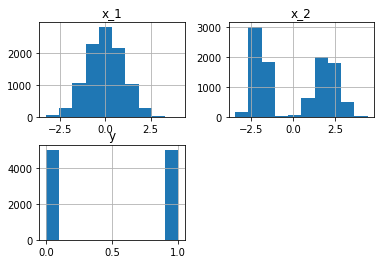

In [43]:
df_1.hist()

Aplicação de SVM com kernel linear - separabilidade perfeita entre os dados

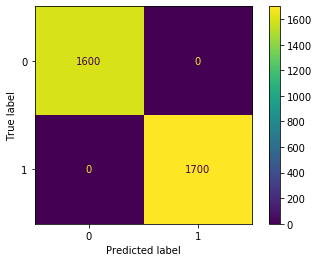

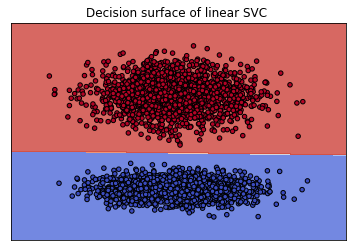

In [53]:
lin_svm = linear_svm(dataset = df_1, c = 1)
relatorio_svm(dataset = df_1, modelo = lin_svm)

Criação do segundo dataset: balanceado, 2 features, 3 classes,  linearmente separável

In [67]:
df_2 = make_toy_dataset(n_samples=10000, n_features= 2, n_informative= 2, n_redundant=0, 
                          n_repeated=0, n_classes=3, n_clusters_per_class= 1 ,class_sep=2,flip_y=0,weights=[1/3,1/3,1/3], 
                          random_state=333)

fig = px.scatter(x=df_2.x_1, y=df_2.x_2, color = df_2.y)
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A239B3D88>,
      dtype=object)

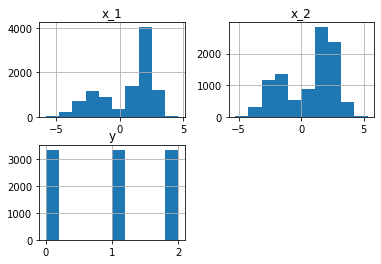

In [70]:
df_2.hist()

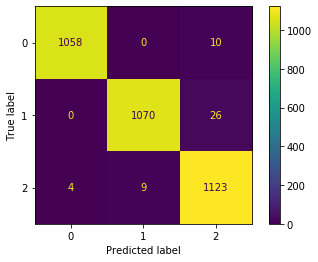

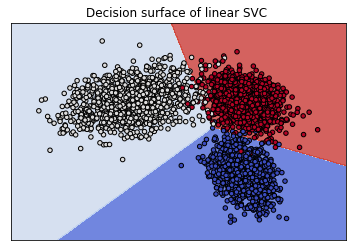

In [68]:
mult_lin_svm = linear_svm(dataset = df_2, c = 1)
relatorio_svm(dataset = df_2, modelo = mult_lin_svm)

Criação do terceiro dataset: balanceado, 2 features, 4 classes,  linearmente separável

In [86]:
df_3 = make_toy_dataset(n_samples=10000, n_features= 2, n_informative= 2, n_redundant=0, 
                          n_repeated=0, n_classes=4, n_clusters_per_class= 1 ,class_sep=1,flip_y=0,weights=[1/4,1/4,1/4,1/4], 
                          random_state=666)

fig = px.scatter(x=df_3.x_1, y=df_3.x_2, color = df_3.y)
fig.show()

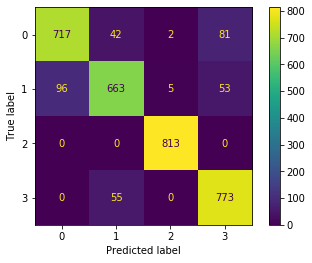

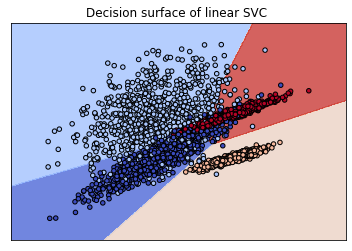

In [87]:
mult_lin_svm_2 = linear_svm(dataset = df_3, c = 1)
relatorio_svm(dataset = df_3, modelo = mult_lin_svm_2)

SVMs com kernel não linear

Criação do quarto dataset: balanceado, 2 features, 2 classes,  não é linearmente separável

In [90]:
df_4 = make_toy_g_dataset(n_feat = 2, n_classes = 2, rs = 666, n_samp = 600)
fig = px.scatter(x=df_4.x_1, y=df_4.x_2, color = df_4.y)
fig.show()

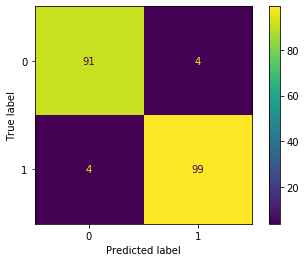

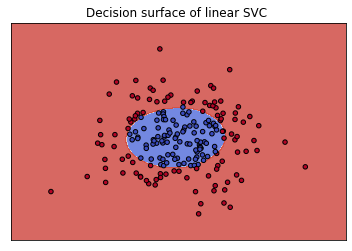

In [98]:
rbf_svm = svc(dataset = df_4, kernel = 'rbf', gamma = 'auto', c = 1)
relatorio_svm(dataset = df_4, modelo = rbf_svm)

In [100]:
df_5 = make_toy_g_dataset(n_feat = 2, n_classes = 4, rs = 666, n_samp = 1000)
fig = px.scatter(x=df_5.x_1, y=df_5.x_2, color = df_5.y)
fig.show()

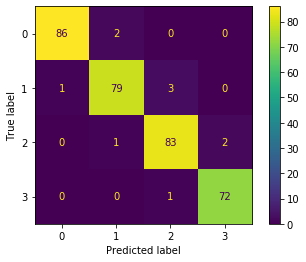

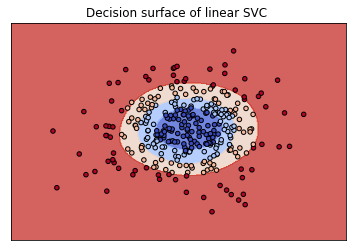

In [103]:
multi_rbf_svm = svc(dataset = df_5, kernel = 'rbf', gamma = 'auto', c = 1)
relatorio_svm(dataset = df_5, modelo = multi_rbf_svm)